In [1]:
import numpy as np
import os 
import keras
import skimage
import matplotlib.pyplot as plt

from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io 

Using TensorFlow backend.


In [2]:
# get current directory
cd = os.getcwd()

In [3]:
def crop_image(image, dim: tuple):
    m, n = dim
    x, y, _ = image.shape
    
    if x > m and y > n:
        
        x0 = int((x - m) / 2) - 1
        y0 = int((y - n) / 2) - 1
        xm = int(m + x0)
        yn = int(n + y0)
        
        return image[x0:xm, y0:yn]
    
    else:
        return image

In [4]:
folder_name = "images"
save_folder = "preproc_images"
image_shape = (28, 28)

In [ ]:
def mean_channel_centering(image):
    
    mean_r = np.mean(image[:,:,0], axis = 0)
    mean_g = np.mean(image[:,:,1], axis = 0)
    mean_b = np.mean(image[:,:,2], axis = 0)
    
    mean_channels = np.array((mean_r, mean_g, mean_b))
    
    centered_image = np.zeros_like(image)
    
    for i, row in enumerate(image):
        for j, col in enumerate(row):
            for k, channel in enumerate(col):
                centered_image[i, j, k] = channel - mean_channels[k]
                
    return centered_image

In [ ]:
def preprocess_imgs(folder_name: str, save_folder: str, image_shape: tuple):
    """
    Function that performs resizing of images.
    """
    file_names = os.listdir(path = cd + "/" + folder_name)
    
    for file in file_names:
        name_old.strip(".")
        print(name_old)
        # 1. load images
        image = skimage.io.imread(folder_name + "/" + file)
        print(image.shape)
        break
        
        # 2. mean centering of the data (axis = 0 -> columnwise)
        
        
        # resize images to a common scale (in favor for computational efficiency)
        image = resize(image, output_shape = image_shape, anti_aliasing = True)
        
        fname = file.replace('.jpg', '.png')
        io.imsave(save_folder + "/" + file, image)
    
    print('all images preprocessed and saved.')

In [ ]:
preprocess_imgs(folder_name, save_folder, image_shape)

In [12]:
img_preprocessor = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True, 
    samplewise_center = False, 
    featurewise_std_normalization = True, 
    samplewise_std_normalization = False, 
    zca_whitening = True, 
    zca_epsilon = 1e-06, #consider this for hyperparameter tuning
    rotation_range = 0, 
    width_shift_range = 0.0, 
    height_shift_range = 0.0, 
    brightness_range = None, # consider later
    shear_range = 0.0, 
    zoom_range = 0.0, 
    channel_shift_range = 0.0, 
    fill_mode = 'nearest',
    rescale = None, 
    preprocessing_function = None, 
    data_format = "channels_last", 
    dtype = float)

C:\Users\Lukas\AppData\Roaming\Python\Python36\site-packages\keras_preprocessing\image\image_data_generator.py:339: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [18]:
preproc_iterator = img_preprocessor.flow_from_directory(folder_name, 
                                     target_size = image_shape,
                                     color_mode = 'rgb', # alternatively try grey scale
                                     classes = None, 
                                     class_mode = None, 
                                     batch_size = 32, 
                                     shuffle = False, 
                                     seed = 42, 
                                     save_to_dir = save_folder, 
                                     save_prefix = '', 
                                     save_format = 'png',
                                     subset = None, 
                                     interpolation = 'bilinear') # alternatively bicubic (if enough computational power) or nearest

Found 6 images belonging to 1 classes.


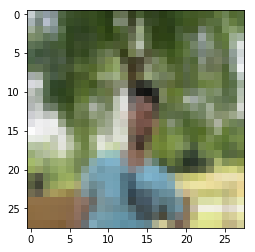

In [19]:
for img_batch in preproc_iterator:
    for img in img_batch:
        img /= 255
        plt.imshow(img)
        break
    break

print('all images preprocessed and saved.')

In [20]:
def change_names(old_folder: str, new_folder: str):
    """
    Rename images after iterator yielded preprocessed versions of them. 
    Save the as original IMG ID + ".png".
    """
    
    file_names_old = os.listdir(path = cd + "/" + old_folder + "/raw")
    file_names_new = os.listdir(path = cd + "/" + new_folder)

    for name_old, name_new in zip(file_names_old, file_names_new):
        name_old = name_old.split(".")[0] + ".png"
        os.rename(new_folder + "/" + name_new, new_folder + "/" + name_old)

In [21]:
change_names(folder_name, save_folder)